In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv("D:\\Python.vs\\Data Set\\train.csv")

In [3]:
df.shape

(10000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [12]:
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


***Data Cleaning***

Dropping useless coulmns

In [89]:
df = df.drop(columns = ["Unnamed: 0", "ID"])

In [90]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


Checking for null values

In [15]:
df.isnull().sum()

City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

***Handling The Missing Values***

Health Indicator

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

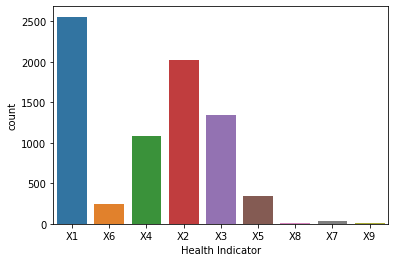

In [7]:
sns.countplot(df["Health Indicator"])

Make Null values as seperate category

In [8]:
# null = pd.isnull(df["Health Indicator"])
# test = df[null]
# train = df[~null]

In [ ]:
# df.groupby(["Health Indicator", "Accomodation_Type"])["Lower_Age"].mean()

In [91]:
label = LabelEncoder()
df["New_Health Indicator"] = label.fit_transform(df["Health Indicator"])
# df["Accomodation_Type"] = label.fit_transform(df["Accomodation_Type"])

In [92]:
df["New_Health Indicator"] = df["New_Health Indicator"].apply(lambda x: ">5" if x>5 else "<5")

In [101]:
df.groupby(["New_Health Indicator", "Accomodation_Type"])["Lower_Age"].mean()

New_Health Indicator  Accomodation_Type
<5                    Owned                48.472149
                      Rented               35.449639
>5                    Owned                48.523495
                      Rented               35.700780
Name: Lower_Age, dtype: float64

In [84]:
df[df["Lower_Age"] == 48]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,New_Health Indicator
37,C2,496,0,Individual,48,48,No,NaN,NaN,NaN,18,13728.0,0,>5
49,C29,3150,0,Joint,57,48,Yes,X1,NaN,NaN,6,19728.0,0,<5
86,C3,2078,0,Individual,48,48,No,NaN,NaN,NaN,2,9728.0,0,>5
120,C2,3753,0,Individual,48,48,No,X1,5,1.0,2,15686.0,0,<5
181,C4,596,0,Joint,52,48,Yes,X1,2,3.0,18,21824.0,1,<5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,C8,426,1,Individual,48,48,No,X1,3,1.0,16,13080.0,0,<5
9895,C4,3836,0,Individual,48,48,No,X1,NaN,NaN,17,9024.0,0,<5
9933,C9,157,1,Individual,48,48,No,X2,2,1.0,4,16944.0,0,<5
9944,C12,330,0,Individual,48,48,No,X2,NaN,NaN,16,11216.0,0,<5


In [17]:
df["Health Indicator"] = df["Health Indicator"].fillna(df["Health Indicator"].mode()[0])
# df["Health Indicator"].fillna("X0", inplace=True)

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

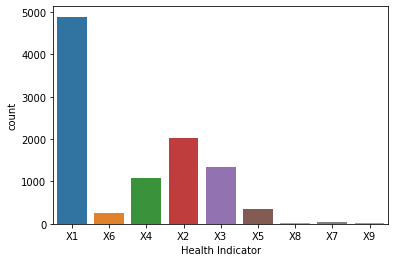

In [18]:
sns.countplot(df["Health Indicator"])

***Holding_Policy_Duration***

In [19]:
df["Holding_Policy_Duration"].unique()

array(['14+', '10', '3', '1', nan, '7', '13', '9', '8', '14', '2', '4',
       '5', '11', '6', '12'], dtype=object)

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

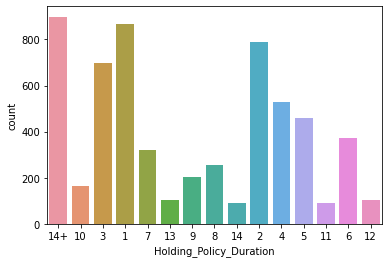

In [21]:
sns.countplot(df["Holding_Policy_Duration"])

In [15]:
df["New_duration"] = df["Holding_Policy_Duration"].apply(lambda x: str(x).replace("14+", "15"))
df["New_duration"].apply(lambda x:np.nan if x == "nan" else x)

0        15
1        10
2         3
3         1
4        15
       ... 
9995    NaN
9996      6
9997      8
9998     15
9999     15
Name: New_duration, Length: 10000, dtype: object

In [22]:
df["New_duration"] = df["New_duration"].astype("float")
df["New_duration"] = df["New_duration"].apply(lambda x: ">14" if x>14 else "<14")

In [23]:
df.groupby(["New_duration", "Accomodation_Type"])["Lower_Age"].mean()

New_duration  Accomodation_Type
<14           Owned                47.373022
              Rented               34.711261
>14           Owned                56.060993
              Rented               53.227979
Name: Lower_Age, dtype: float64

In [99]:
pd.set_option('display.max_rows', None)

In [100]:
df[(df["Accomodation_Type"] == "Owned") & (df["Lower_Age"] == 47)]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,New_Health Indicator
125,C7,2330,Owned,Individual,47,47,No,NaN,NaN,NaN,20,13640.0,0,>5
419,C3,3213,Owned,Individual,47,47,No,NaN,5,2.0,21,12740.0,0,>5
469,C32,2715,Owned,Joint,49,47,Yes,X2,14,3.0,18,12790.4,0,<5
549,C3,311,Owned,Individual,47,47,No,NaN,4,2.0,12,12060.0,0,>5
771,C15,1949,Owned,Individual,47,47,No,X1,14+,3.0,22,15384.0,0,<5
879,C8,1557,Owned,Joint,59,47,Yes,X4,NaN,NaN,21,18340.0,0,<5
904,C2,14,Owned,Joint,49,47,No,X3,11,2.0,21,22836.0,0,<5
1131,C24,1868,Owned,Individual,47,47,No,X2,8,2.0,1,9414.0,0,<5
1149,C2,4749,Owned,Individual,47,47,No,X2,NaN,NaN,11,14448.0,0,<5
1305,C2,632,Owned,Joint,48,47,Yes,X5,NaN,NaN,14,16819.2,0,<5


Make Null values as seperate category

In [22]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x:str(x).replace('nan', "3"))
# df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x:str(x).replace('nan', "0"))

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

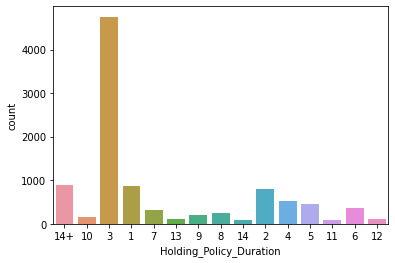

In [23]:
sns.countplot(df["Holding_Policy_Duration"])

***Holding_Policy_Type***

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='Count'>

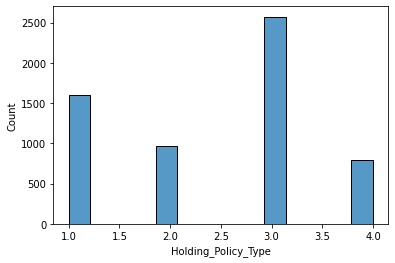

In [24]:
sns.histplot(df["Holding_Policy_Type"])

In [25]:
df["Holding_Policy_Type"].value_counts()

3.0    2573
1.0    1602
2.0     973
4.0     798
Name: Holding_Policy_Type, dtype: int64

In [26]:
print("Mean", df["Holding_Policy_Type"].mean())
print("Mode", df["Holding_Policy_Type"].mode()[0])
print("Median", df["Holding_Policy_Type"].median())

Mean 2.4317188025563405
Mode 3.0
Median 3.0


In [27]:
df["Holding_Policy_Type"] = df["Holding_Policy_Type"].fillna(df["Holding_Policy_Type"].mode()[0])
# df["Holding_Policy_Type"] = df["Holding_Policy_Type"].fillna(df["Holding_Policy_Type"].mean())

In [28]:
df["Holding_Policy_Type"].fillna("0", inplace = True)

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='Count'>

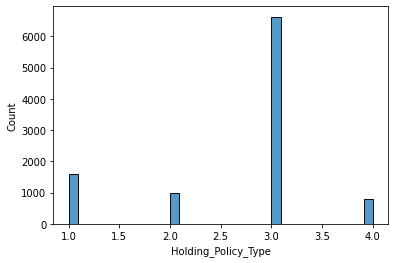

In [29]:
sns.histplot(df["Holding_Policy_Type"])

In [30]:
df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

# Exploratory Data Analysis

## Univaraite Analysis

#### Target class distribution


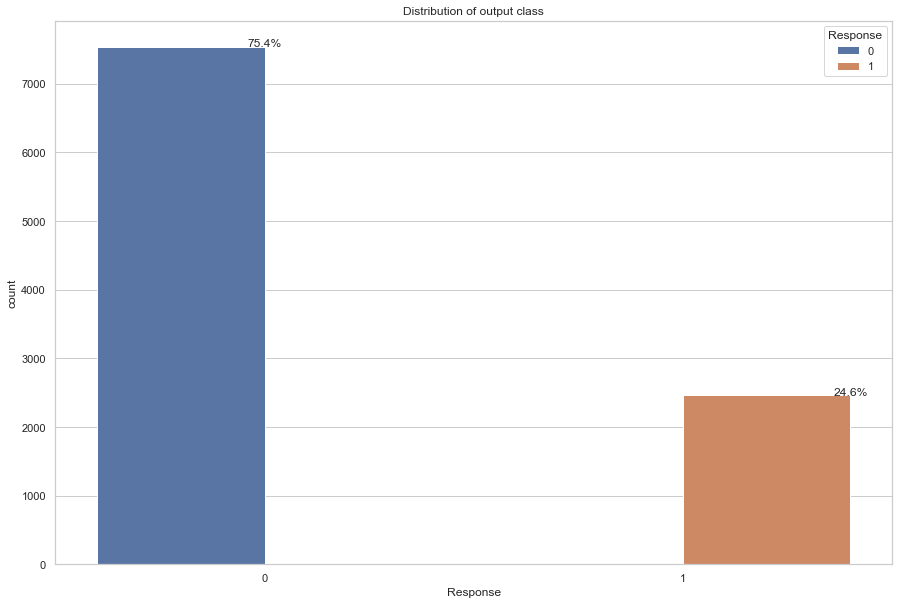

In [97]:
ax=sns.set(style = "whitegrid")
plt.figure(figsize = (15, 10))
total = float(len(df))
ax = sns.countplot(x = "Response", hue = "Response", data = df)
plt.title("Distribution of output class")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

* Zero is dominating by far in the Response variable.
* THE data is highly imbalanced.

#### Let's see city-wise customers interests in recommended policy

<AxesSubplot:xlabel='City_Code', ylabel='count'>

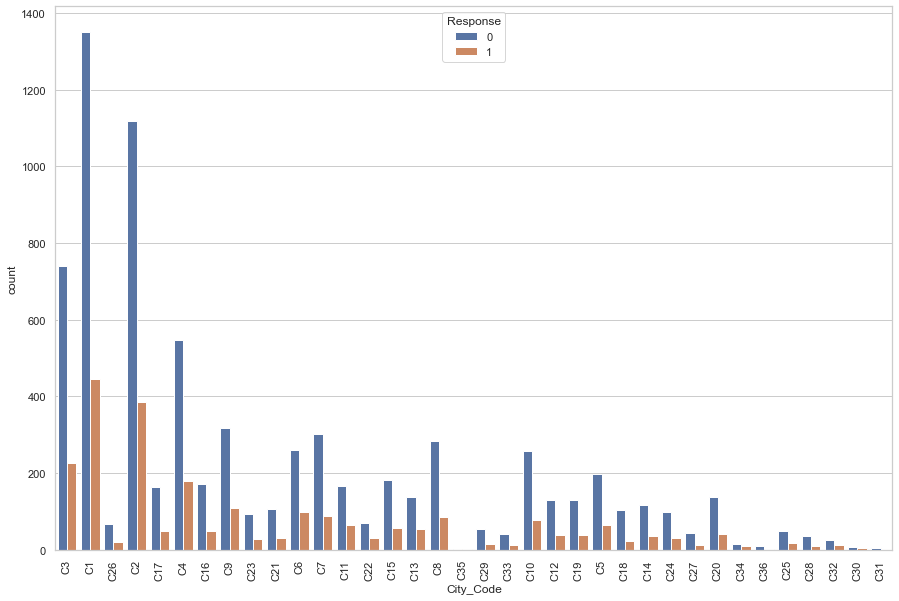

In [98]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 90)
sns.countplot(x = "City_Code", hue = "Response", data = df)

* some cites like c1,c2 consist high distribution .
* In all of the cities, 0 is dominating .

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

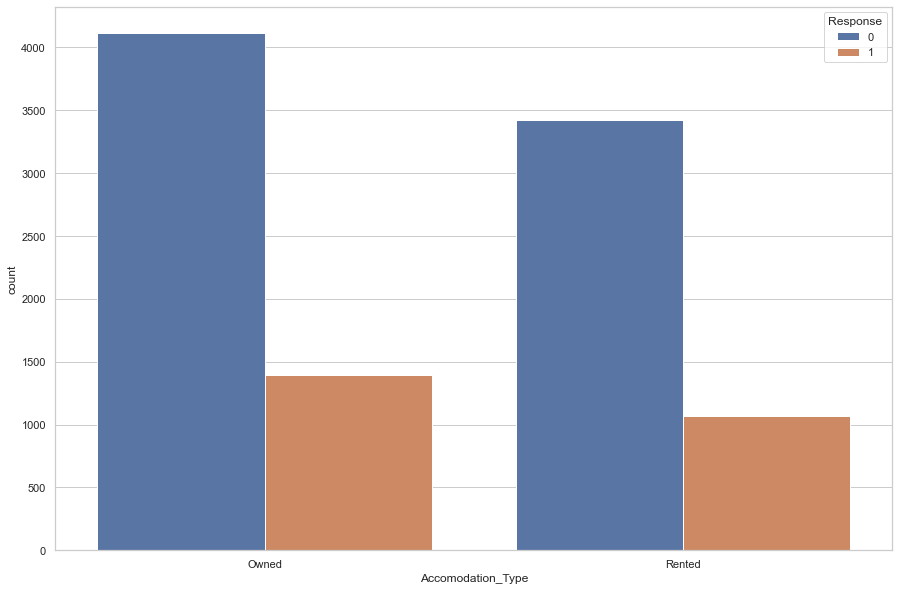

In [99]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 0)
sns.countplot(x = "Accomodation_Type", hue = "Response", data = df)

* Customers who owned house have more interest in insurance.
* But there are some cities in with exception.

#### Is_Spouse

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

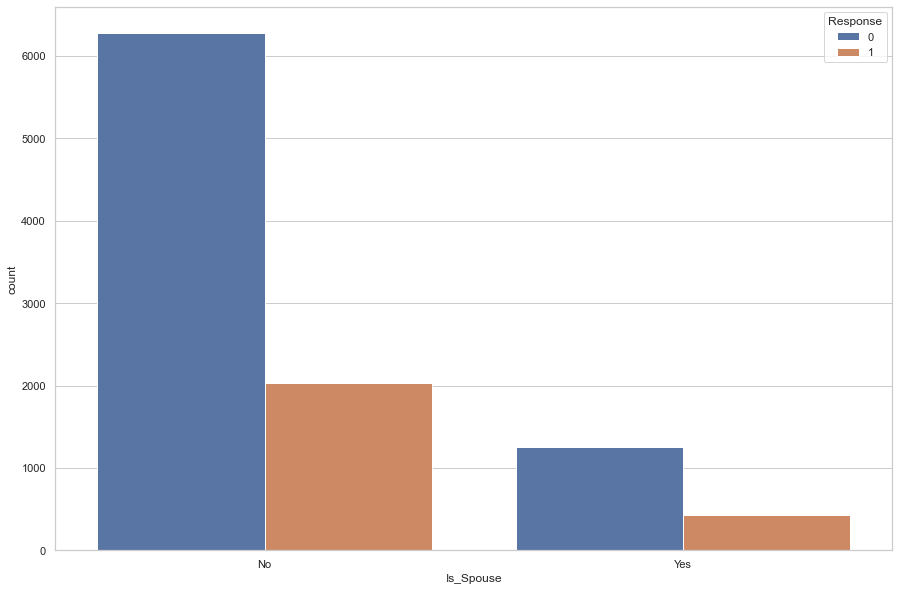

In [100]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Is_Spouse", hue = "Response", data = df)

* Customers who marriaged have lesser interest in insurance.
* This is bizzar but true.

#### Reco_Insurance_Type

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

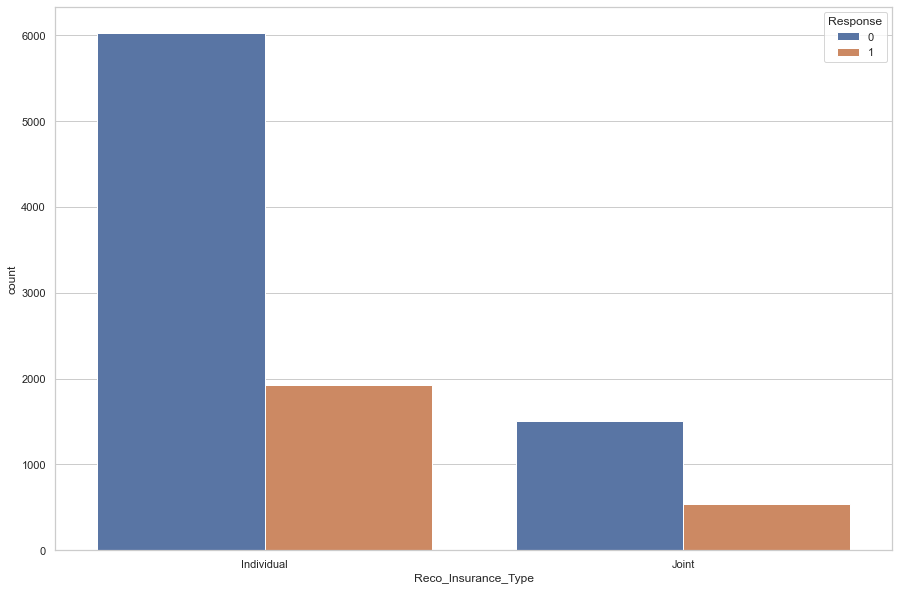

In [101]:
plt.figure(figsize = (15, 10))
sns.countplot(x = "Reco_Insurance_Type", hue = "Response", data = df)

* Most of customers interested on individual insurance.

#### Health Indicator

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

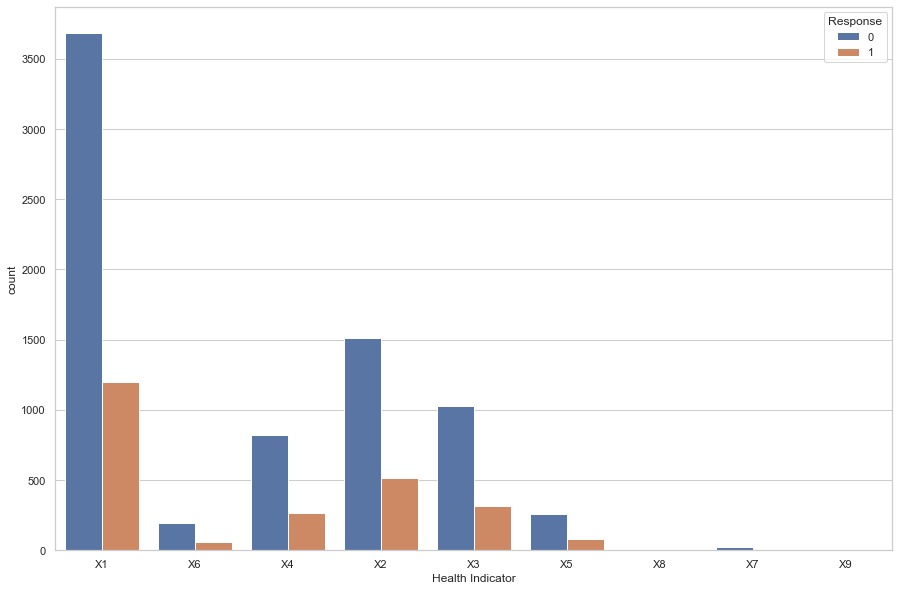

In [102]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Health Indicator", hue = "Response", data = df)

#### Holding_Policy_Duration

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

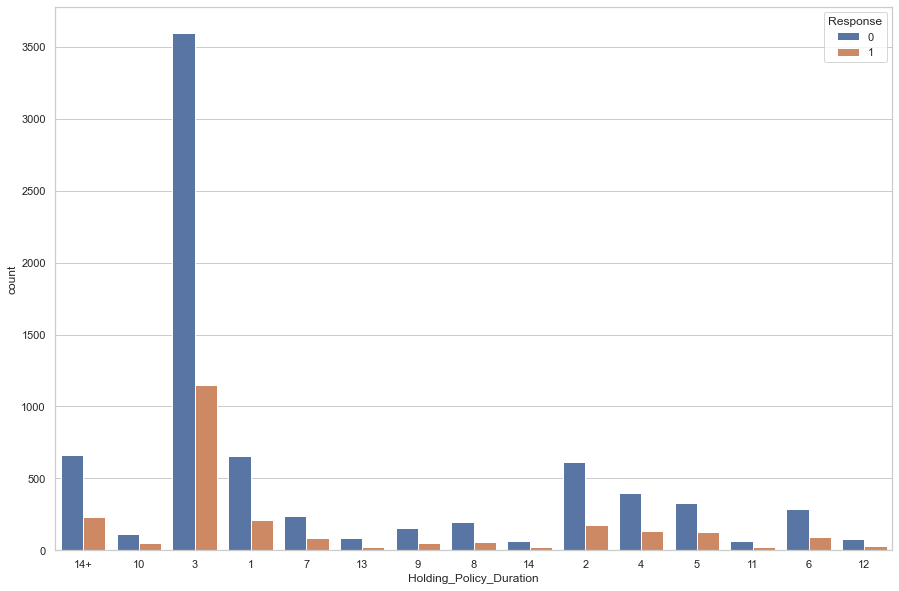

In [103]:
plt.figure(figsize = (15, 10))
sns.countplot(x = "Holding_Policy_Duration", hue = "Response", data = df)

#### Holding_Policy_Type

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

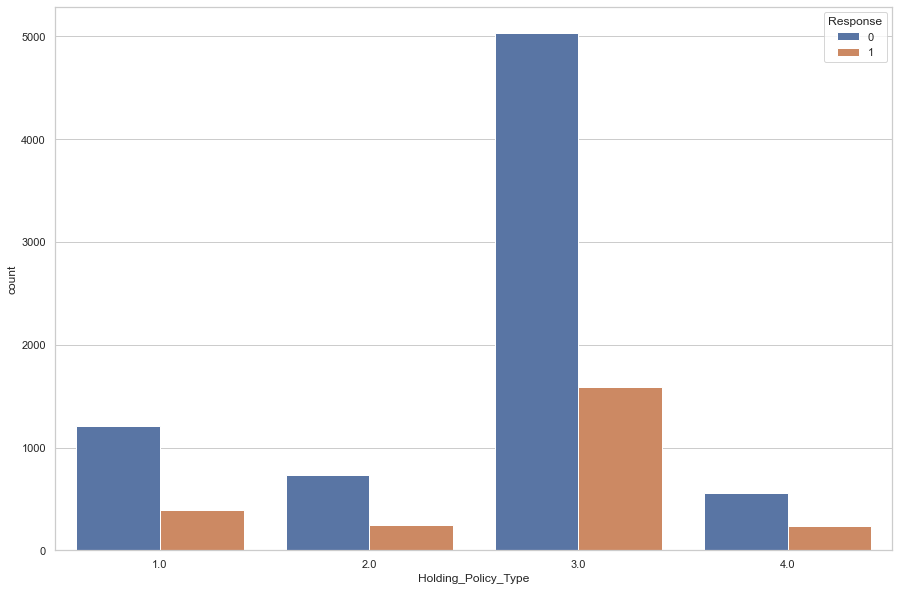

In [104]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Holding_Policy_Type", hue = "Response", data = df)

#### Reco_Policy_Cat

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

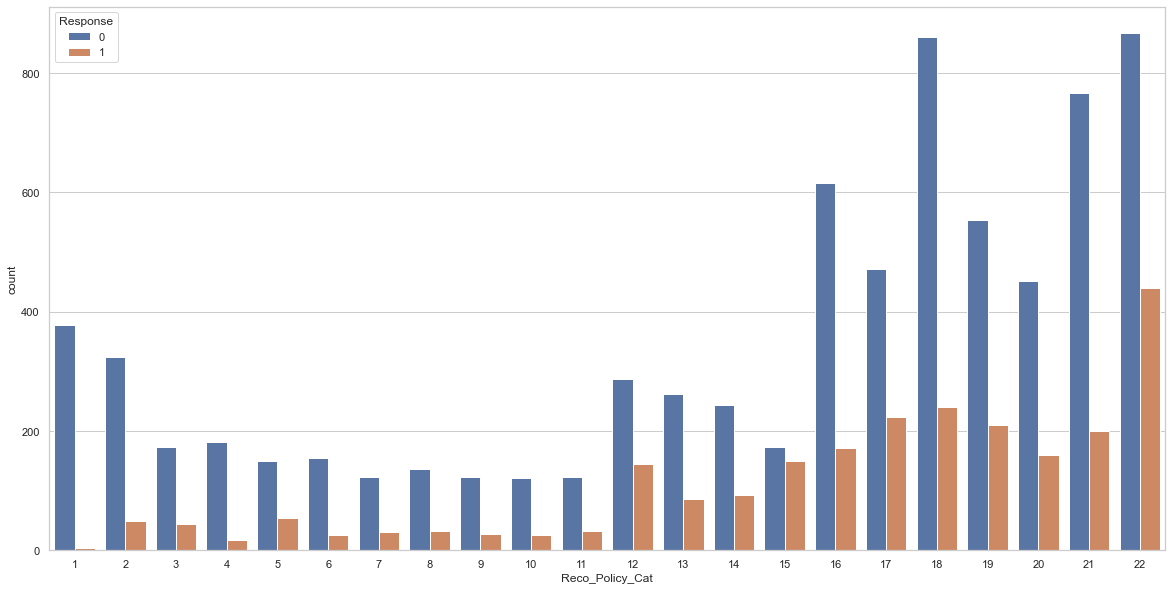

In [105]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Reco_Policy_Cat", hue = "Response",data = df)

#### Upper Age

#### Lower Age

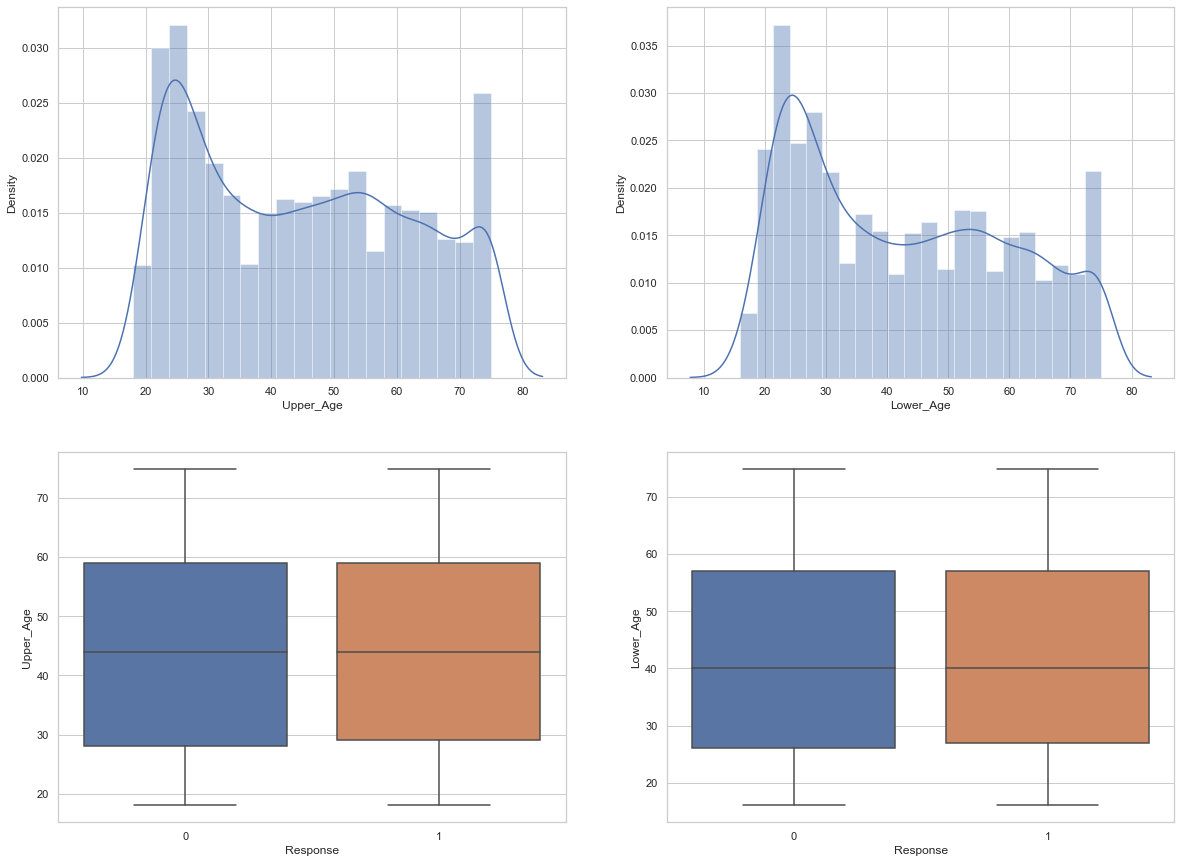

In [106]:
plt.figure(figsize = (20, 15))
plt.subplot(221)
sns.distplot(df["Upper_Age"])

plt.subplot(222)
sns.distplot(df["Lower_Age"])

plt.subplot(223)
sns.boxplot(x  = 'Response', y = 'Upper_Age', data = df)

plt.subplot(224)
sns.boxplot(x  = 'Response', y = 'Lower_Age', data = df)
plt.show()


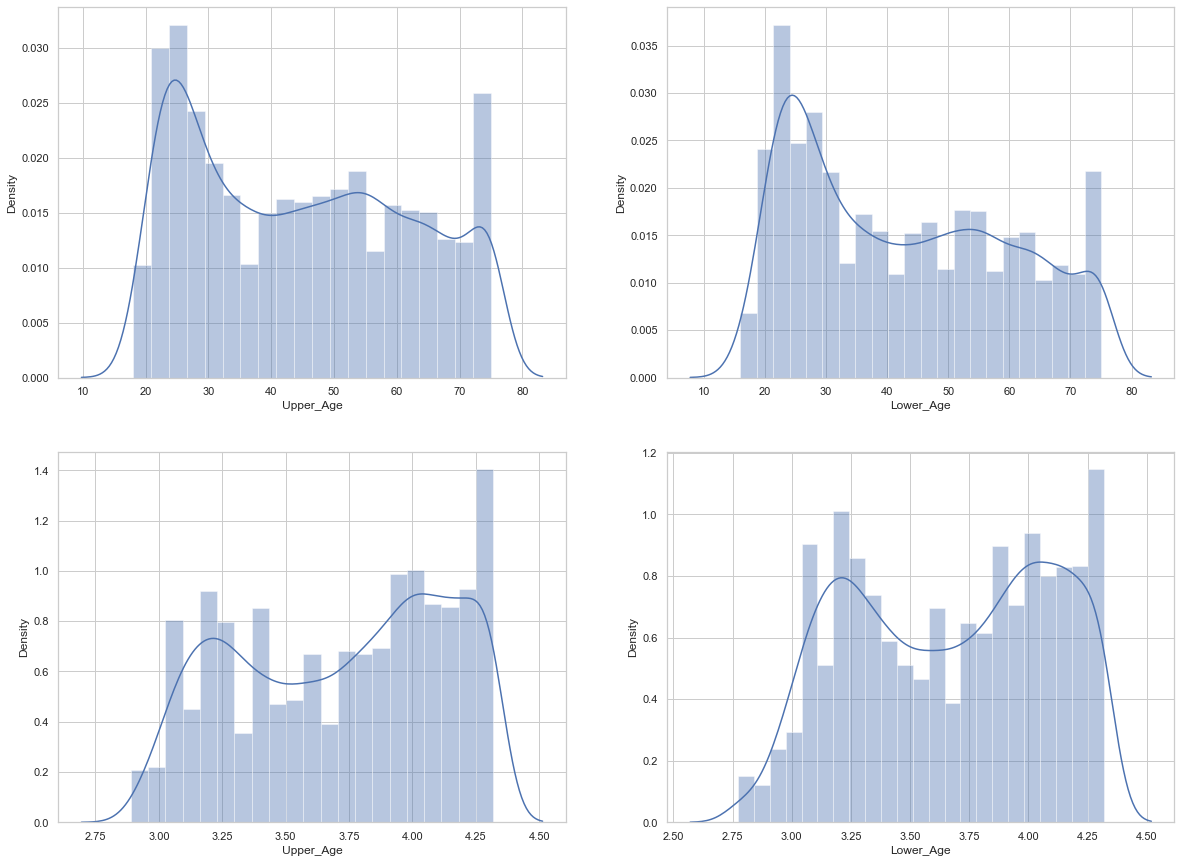

In [107]:
plt.figure(figsize = (20, 15))
plt.subplot(221)
sns.distplot(df["Upper_Age"])

plt.subplot(222)
sns.distplot(df["Lower_Age"])

plt.subplot(223)
sns.distplot(np.log(df["Upper_Age"]))

plt.subplot(224)
sns.distplot(np.log(df["Lower_Age"]))
plt.show()

* Responses in Upper Age are similar.
* Responses in Lower Age are aslo similar.

#### Reco_Policy_Premium

<AxesSubplot:xlabel='Response', ylabel='Reco_Policy_Premium'>

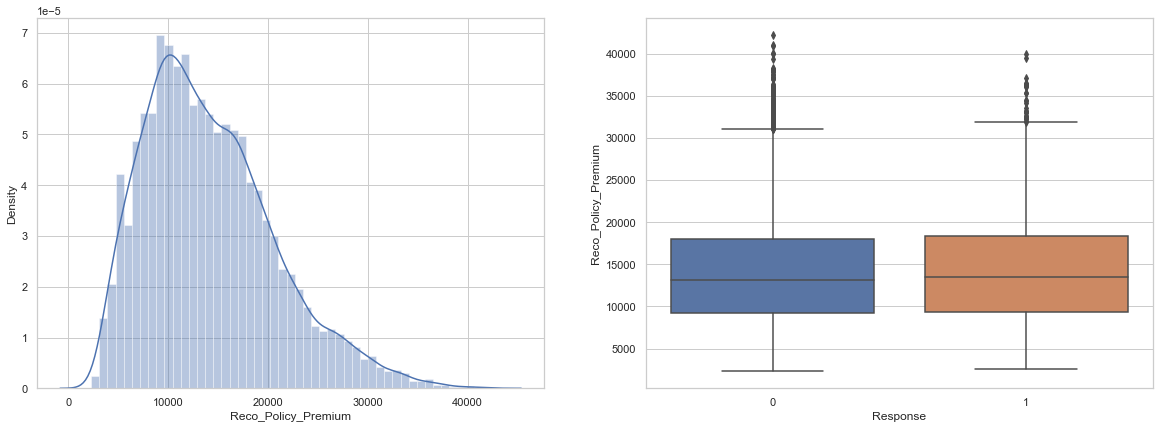

In [108]:
plt.figure(figsize = (20,15))
plt.subplot(221)
sns.distplot(df["Reco_Policy_Premium"])

plt.subplot(222)
sns.boxplot(x  = 'Response', y = 'Reco_Policy_Premium', data = df)


In [109]:
Q1 = df["Reco_Policy_Premium"].quantile(q = 0.25)
Q3 = df["Reco_Policy_Premium"].quantile(q = 0.75)
IQR = Q3-Q1
UB = df["Reco_Policy_Premium"] > (Q3 + 1.5 * IQR)
LB = df["Reco_Policy_Premium"] < (Q1 - 1.5 * IQR)
print(((LB) | (UB)).sum())

151


<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

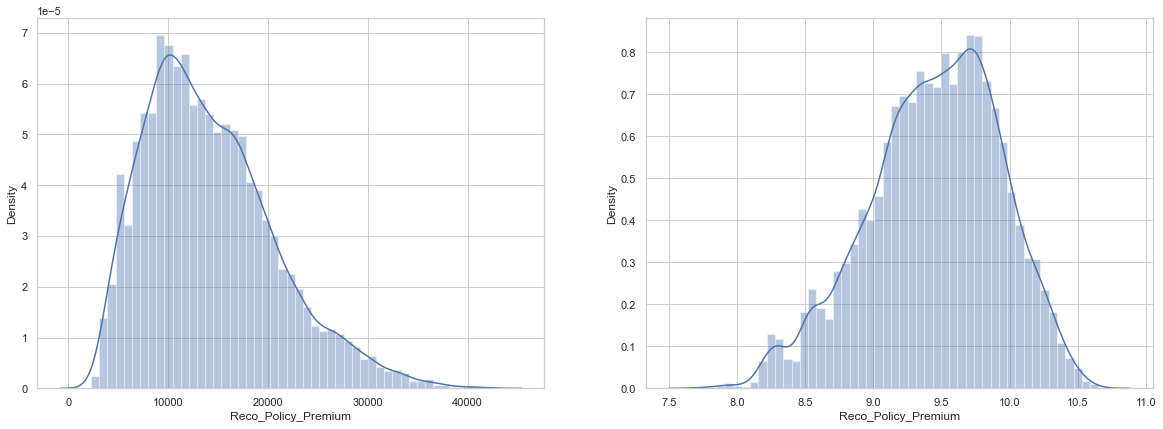

In [110]:
plt.figure(figsize = (20,15))
plt.subplot(221)
sns.distplot(df["Reco_Policy_Premium"])

plt.subplot(222)
sns.distplot(np.log(df["Reco_Policy_Premium"]))


#### Changing the column to z_score.

In [111]:
from scipy import stats

In [112]:
df["Reco_Policy_Premium"] = stats.zscore(df["Reco_Policy_Premium"])

* The dataset consists of 13 features.
* It is a binary classification problem.
* The dataset is imbalanced.
* The dataset contains a large number of missing values , so they should be imputed in an appropriate way.
* Most of the features are categorical.
 
* we are not getting much information from plots .

## Label Encoding

Observe that ["City_Code", "Health Indicator", "Accomodation_Type", "Reco_Insurance_Type", "Is_Spouse"].

Above these Object columns have two values - Yes and No.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                10000 non-null  object 
 1   Region_Code              10000 non-null  int64  
 2   Accomodation_Type        10000 non-null  object 
 3   Reco_Insurance_Type      10000 non-null  object 
 4   Upper_Age                10000 non-null  int64  
 5   Lower_Age                10000 non-null  int64  
 6   Is_Spouse                10000 non-null  object 
 7   Health Indicator         10000 non-null  object 
 8   Holding_Policy_Duration  10000 non-null  object 
 9   Holding_Policy_Type      10000 non-null  float64
 10  Reco_Policy_Cat          10000 non-null  int64  
 11  Reco_Policy_Premium      10000 non-null  float64
 12  Response                 10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder

In [115]:
label = LabelEncoder()
col = ["City_Code", "Health Indicator", "Accomodation_Type", "Reco_Insurance_Type", "Is_Spouse", "Holding_Policy_Duration"]
for i in col:
    df[i] = label.fit_transform(df[i])

## Dropping useless "+" operator from Holding_Policy_Duration


In [31]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x:str(x).replace('+', ''))

In [32]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,64,Owned,Individual,36,36,No,X1,14,2.0,16,13320.0,0
1,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,C1,1542,Rented,Individual,24,24,No,X1,3,1.0,16,7310.0,0
3,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,C2,1510,Owned,Joint,59,58,Yes,X1,14,4.0,17,23673.0,0


In [33]:
df["Holding_Policy_Duration"] = df["Holding_Policy_Duration"].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                10000 non-null  object 
 1   Region_Code              10000 non-null  int64  
 2   Accomodation_Type        10000 non-null  object 
 3   Reco_Insurance_Type      10000 non-null  object 
 4   Upper_Age                10000 non-null  int64  
 5   Lower_Age                10000 non-null  int64  
 6   Is_Spouse                10000 non-null  object 
 7   Health Indicator         10000 non-null  object 
 8   Holding_Policy_Duration  10000 non-null  int32  
 9   Holding_Policy_Type      10000 non-null  float64
 10  Reco_Policy_Cat          10000 non-null  int64  
 11  Reco_Policy_Premium      10000 non-null  float64
 12  Response                 10000 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 976.7+ KB


## Distribution Plots

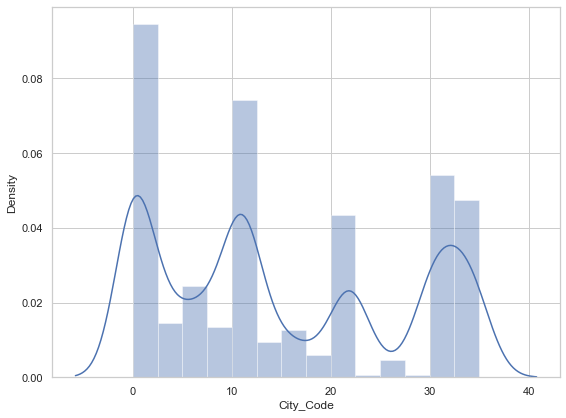

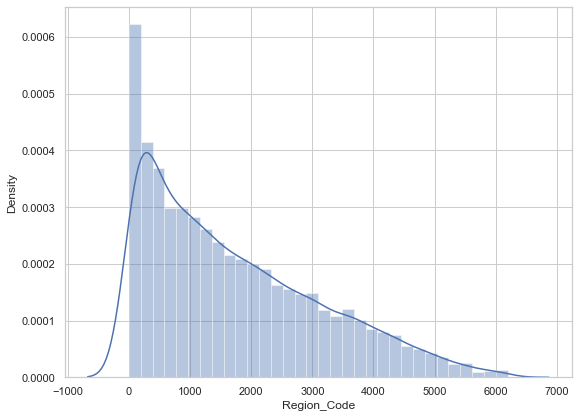

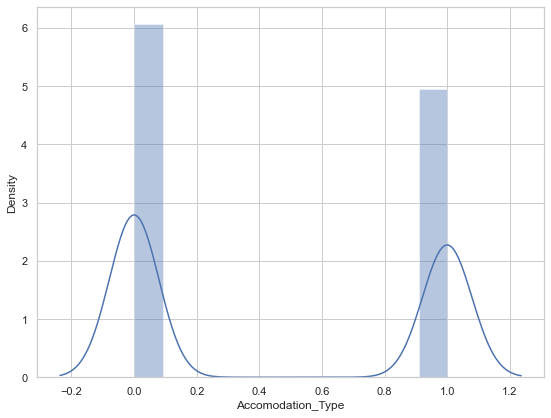

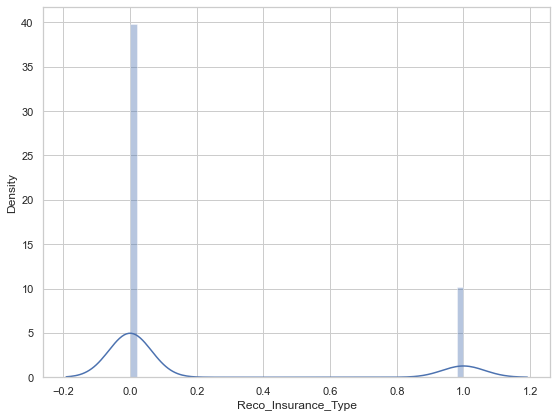

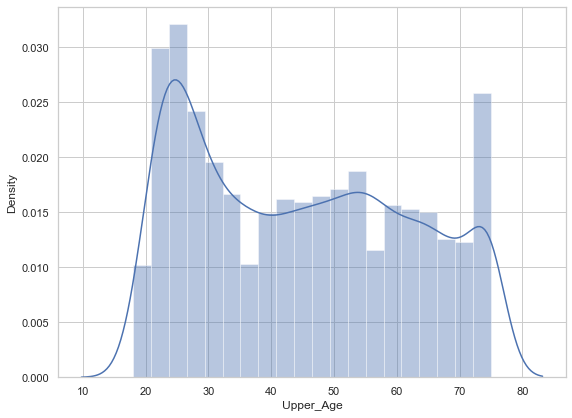

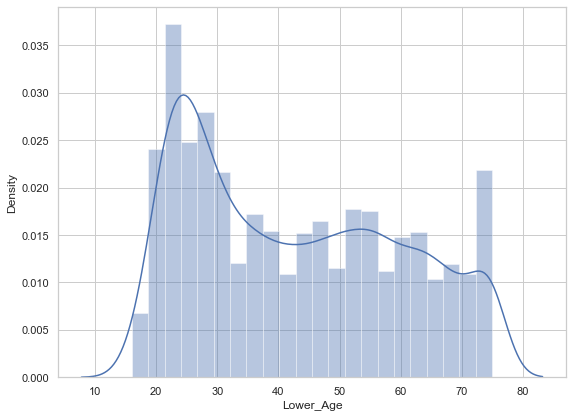

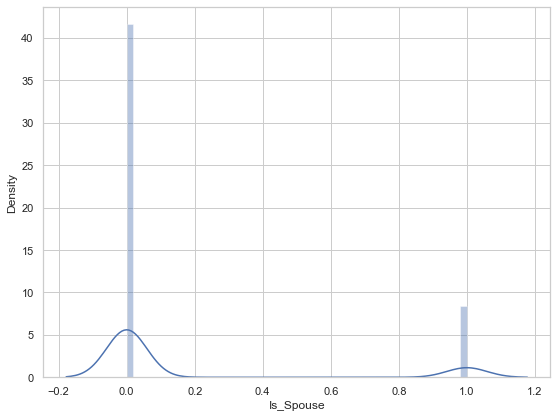

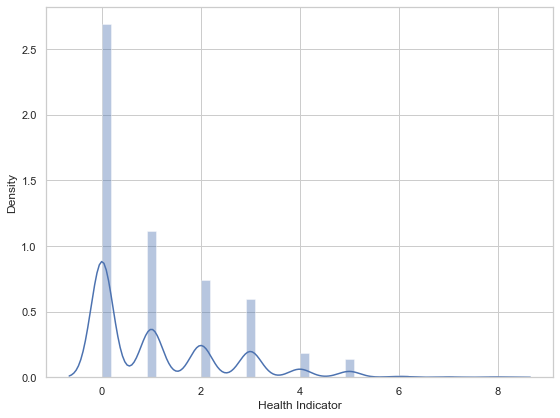

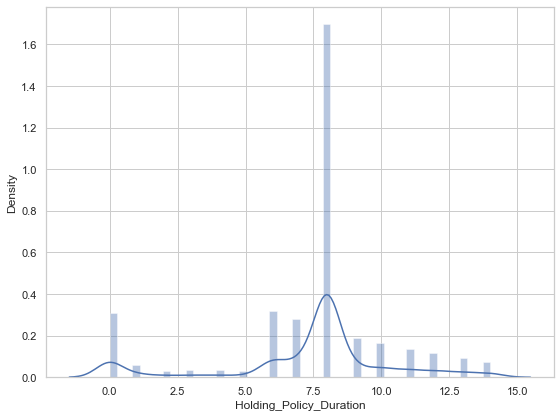

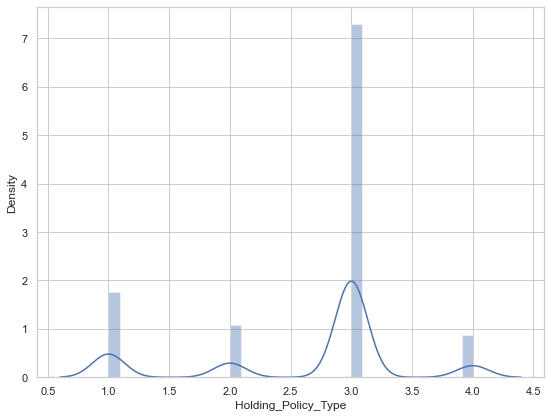

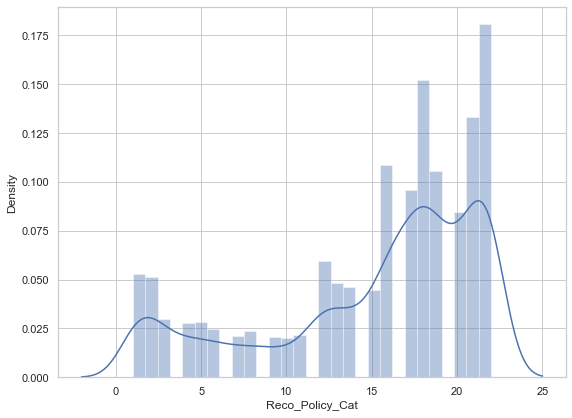

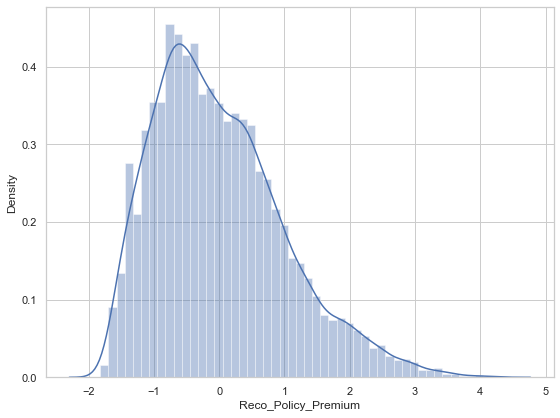

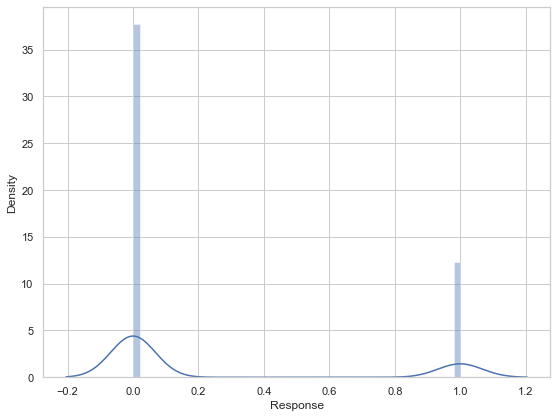

In [120]:
for i in df.columns:
    plt.figure(figsize = (20,15))
    plt.subplot(221)
    sns.distplot(df[i])


### Model Building


In [121]:
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score

In [191]:
def Model(data , models, thrsold):
    X = data.drop(columns = "Response", axis = 1)
    Y = data["Response"]

    std = StandardScaler()
    X = std.fit_transform(X)

    smote = SMOTE(random_state = 21, sampling_strategy = .60)
    X, Y = smote.fit_resample(X, Y)


    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 112)

    col_names = ["Algo", "Accuracy", "Precision", "Recall", "F1_score", "Auc"]
    results_train = pd.DataFrame(columns = col_names)
    results_test = pd.DataFrame(columns = col_names)


    i = 0
    for name, model in models:

        model.fit(x_train, y_train)
        x_train_pred = model.predict_proba(x_train)[:,1]
        accuracy, precision, recall, f1_score, roc_auc = eval_metrics_train(y_train, x_train_pred, thrsold)
        results_train.loc[i] = [name,accuracy,precision,recall,f1_score,roc_auc]
        
        x_test_pred = model.predict_proba(x_test)[:,1]
        accuracy, precision, recall, f1_score, roc_auc = eval_metrics_test(y_test, x_test_pred, thrsold)
        results_test.loc[i] = [name,accuracy,precision,recall,f1_score,roc_auc]
        i += 1

        
    return(results_train, results_test) 

In [123]:
def eval_metrics_train(target, prob, threshold):
        """ target = y_yest,prob = logistic.predict(X_test),Threshold = Cutoff Threshold """
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)

In [124]:
def eval_metrics_test(target, prob, threshold):
        """ target = y_yest,prob = logistic.predict(X_test),Threshold = Cutoff Threshold """
        data_1=pd.DataFrame()
        data_1['pred_proba'] = pd.Series(prob)
        data_1['pred'] = data_1['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data_1['pred'])
        precision= metrics.precision_score(target,data_1['pred'])
        recall= metrics.recall_score(target,data_1['pred'])
        f1_score = metrics.f1_score(target,data_1['pred'])
        roc_auc = metrics.roc_auc_score(target,data_1['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)

In [125]:
models = []
models.append(("SVM", SVC(probability = True)))
models.append(("xgboost", XGBClassifier()))
models.append(("Ada Boost", AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators = 50))))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Logistic Regression", LogisticRegression()))

In [142]:
Model(df, models, thrsold = 0.50)

[12:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(                  Algo  Accuracy  Precision    Recall  F1_score       Auc
 0                  SVM  0.659656   0.751938  0.134349  0.227967  0.553934
 1              xgboost  0.909552   0.987879  0.767590  0.863913  0.880981
 2            Ada Boost  1.000000   1.000000  1.000000  1.000000  1.000000
 3        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
 4        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
 5  Logistic Regression  0.625673   0.485149  0.013573  0.026408  0.502483,
                   Algo  Accuracy  Precision    Recall  F1_score       Auc
 0                  SVM  0.627435   0.542857  0.103939  0.174472  0.525285
 1              xgboost  0.769167   0.820467  0.500000  0.621346  0.716644
 2            Ada Boost  0.772897   0.838889  0.495624  0.623109  0.718792
 3        Random Forest  0.775798   0.846011  0.498906  0.627667  0.721768
 4        Decision Tree  0.688355   0.584551  0.612691  0.598291  0.673591
 5  Logistic Regression 

## Hyperparameter Tuning for XGBClassifier()

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
params = {"n_estimators": range(30, 80, 10)} 

x = df.drop(columns = "Response", axis = 1)
Y = df["Response"]

std = StandardScaler()
X = std.fit_transform(X)

smote = SMOTE(random_state = 21, sampling_strategy = .60)
X, Y = smote.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 112)


model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

grid = GridSearchCV(estimator = model, param_grid = params, cv = 5, scoring = "accuracy")

grid.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [12442, 10000]

In [196]:
best_params = grid.best_params_
print(best_params)
print(grid.best_estimator_)
grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Hyperparameter Tuning for Adaboost

In [152]:
params = {'n_estimators': range(20, 100, 10), 'learning_rate': [0.1], "random_state" : [112]}

X = df.drop(columns = "Response", axis = 1)
Y = df["Response"]

std = StandardScaler()
X = std.fit_transform(X)

smote = SMOTE(random_state = 21, sampling_strategy = .65)
X, Y = smote.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 112)


model = AdaBoostClassifier(base_estimator = )

grid = GridSearchCV(estimator = model, param_grid = params, cv = 5, scoring = "accuracy")

grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=GradientBoostingClassifier(max_depth=8,
                                                                                    max_features='sqrt',
                                                                                    min_samples_leaf=50,
                                                                                    min_samples_split=500,
                                                                                    random_state=10,
                                                                                    subsample=0.8)),
             param_grid={'learning_rate': [0.1],
                         'n_estimators': range(20, 100, 5),
                         'random_state': [112]},
             scoring='accuracy')

In [2]:
best_params = grid.best_params_
print(best_params)
print(grid.best_estimator_)
grid.best_score_

NameError: name 'grid' is not defined

## Hyperparameter Tuning for Random Forest

In [4]:
params = {"criterion" : ["gini", "entropy"],"min_samples_leaf" : range(1, 10, 1),"min_samples_split" : range(2, 10, 1)}

X = df.drop(columns = "Response", axis = 1)
Y = df["Response"]

std = StandardScaler()
X = std.fit_transform(X)

smote = SMOTE(random_state = 21, sampling_strategy = .65)
X, Y = smote.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 112)


model = RandomForestClassifier()

grid = GridSearchCV(estimator = model, param_grid = params, cv = 5, scoring = "accuracy")

grid.fit(x_train, y_train)

NameError: name 'df' is not defined

In [168]:
best_params = grid.best_params_
print(best_params)
print(grid.best_estimator_)
grid.best_score_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}
RandomForestClassifier()


0.7889084801203405

## Hyperparameter Tuning for Decision Tree

In [154]:
params = {"criterion" : ["gini", "entropy"],"max_depth" : range(2, 20, 1),"min_samples_leaf" : range(1, 10, 1),"min_samples_split" : range(2, 10, 1),"splitter" : ["best", "random"]}

X = df.drop(columns = "Response", axis = 1)
Y = df["Response"]

std = StandardScaler()
X = std.fit_transform(X)

smote = SMOTE(random_state = 21, sampling_strategy = .65)
X, Y = smote.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 112)


model = DecisionTreeClassifier()

grid = GridSearchCV(estimator = model, param_grid = params, cv = 5, scoring = "accuracy")

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [155]:
best_params = grid.best_params_
print(best_params)
print(grid.best_estimator_)
grid.best_score_

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=5)


0.7205853476321841

In [171]:
models = []
models.append(("xgboost", XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=8, max_features='sqrt',
                                     min_child_weight=None, min_samples_leaf=50,
                                     min_samples_split=500,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=10,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None)))
models.append(("Ada Boost", AdaBoostClassifier(base_estimator=GradientBoostingClassifier(max_depth=8,
                                               max_features='sqrt',
                                               min_samples_leaf=50,
                                               min_samples_split=500,
                                               random_state=10,
                                               subsample=0.8),
                   learning_rate=0.1, n_estimators=25, random_state=112)))
models.append(("Random Forest", RandomForestClassifier(criterion = "gini", 
                                                       min_samples_leaf = 1, min_samples_split = 2)))
models.append(("Decision Tree", DecisionTreeClassifier(criterion='gini', max_depth=17, min_samples_leaf=2,
                                                       min_samples_split=5, splitter = 'best')))
                       

In [172]:
Model(df, models, thrsold = 0.50)

[15:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(            Algo  Accuracy  Precision    Recall  F1_score       Auc
 0        xgboost  0.886138   0.991389  0.701662  0.821736  0.849010
 1      Ada Boost  0.833402   0.956244  0.581163  0.722950  0.782637
 2  Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
 3  Decision Tree  0.861479   0.911925  0.696953  0.790077  0.828367,
             Algo  Accuracy  Precision    Recall  F1_score       Auc
 0        xgboost  0.777870   0.876494  0.481400  0.621469  0.720020
 1      Ada Boost  0.772068   0.858268  0.477024  0.613221  0.714496
 2  Random Forest  0.774969   0.834234  0.506565  0.630361  0.722595
 3  Decision Tree  0.713634   0.659971  0.503282  0.571074  0.672588)